In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv'
]

all_data = pd.concat([pd.read_csv(f).assign(task=os.path.basename(f).replace('_results.csv', '')) for f in csv_files if os.path.exists(f)], ignore_index=True)
final_summary = all_data.query("run == 'average'")[['task', 'model_name', 'mlae', 'std', 'confidence']].round(3)
final_summary = final_summary.sort_values(by=['task', 'mlae'])

#for task_name, task_data in final_summary.groupby('task'):
    #print(task_data)
    #print("\n" + "="*60 + "\n")


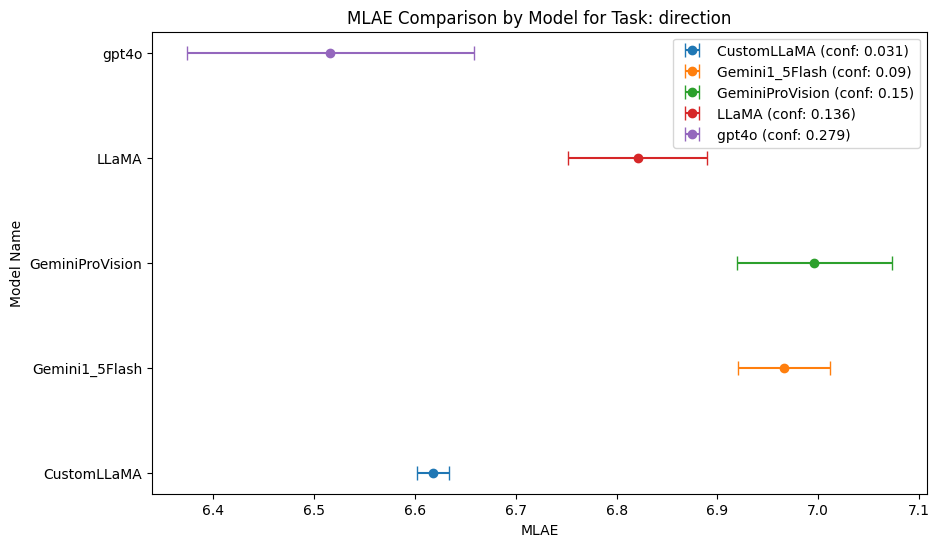

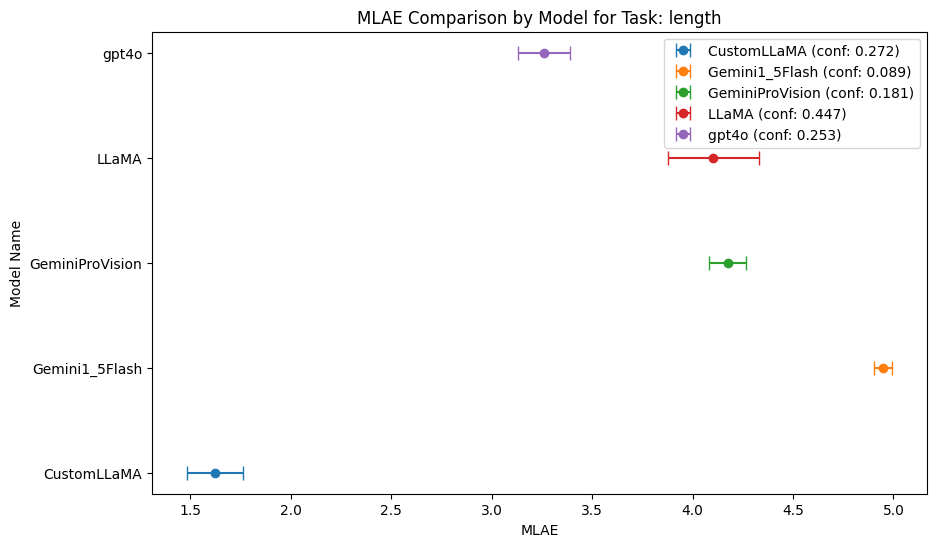

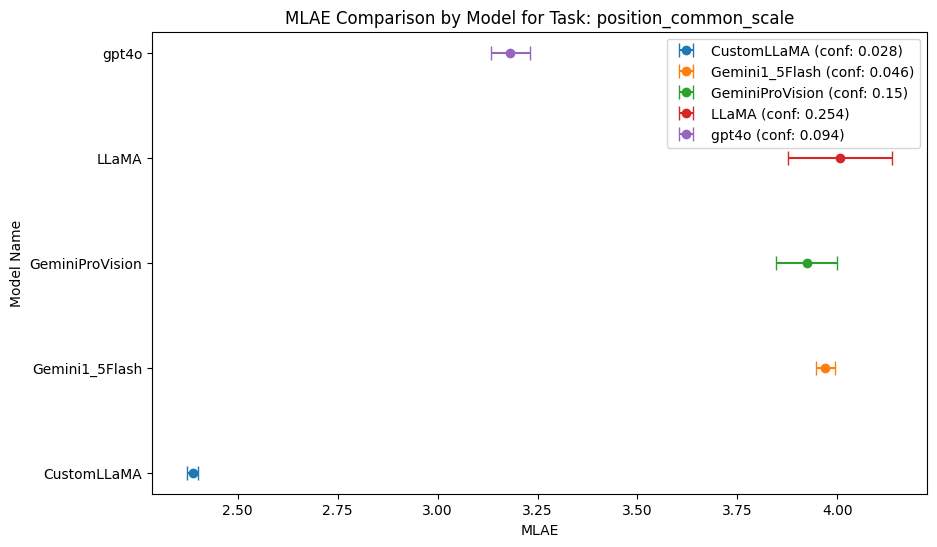

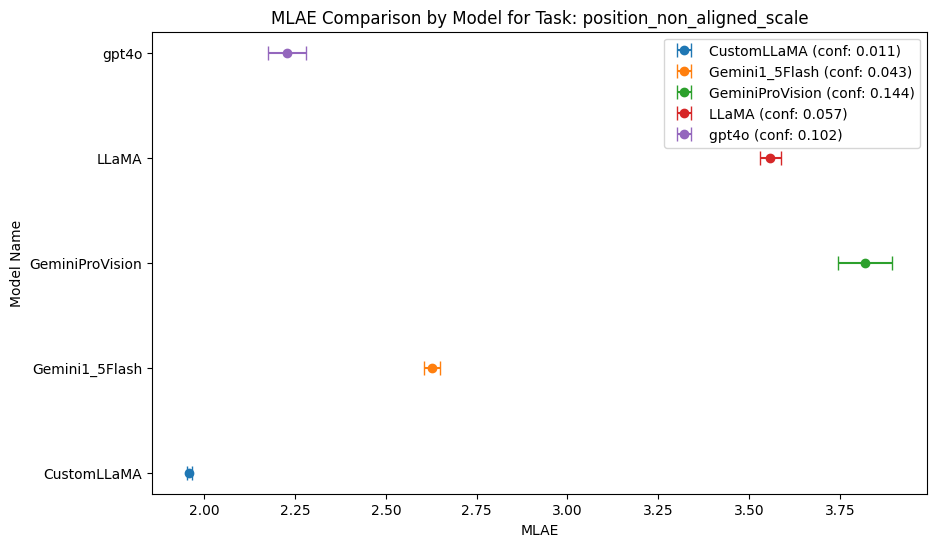

In [5]:
for task_name, task_data in final_summary.groupby('task'):
    plt.figure(figsize=(10, 6))
    
    for model_name, model_data in task_data.groupby('model_name'):
        plt.errorbar(model_data['mlae'].values[0], model_name, xerr=model_data['std'].values[0], fmt='o', capsize=5, label=f"{model_name} (conf: {model_data['confidence'].values[0]})")
    
    plt.title(f'MLAE Comparison by Model for Task: {task_name}')
    plt.xlabel('MLAE')
    plt.ylabel('Model Name')
    plt.legend()
    plt.show()

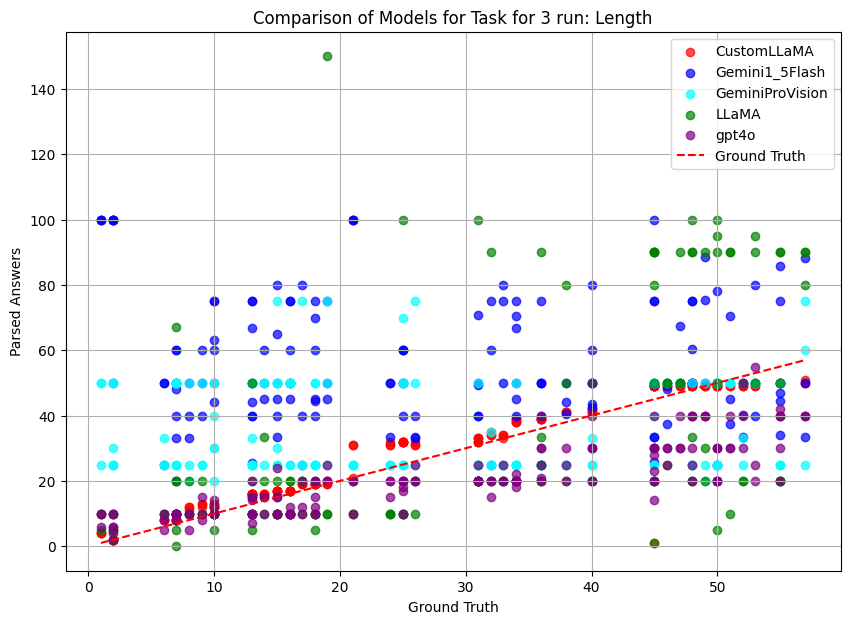

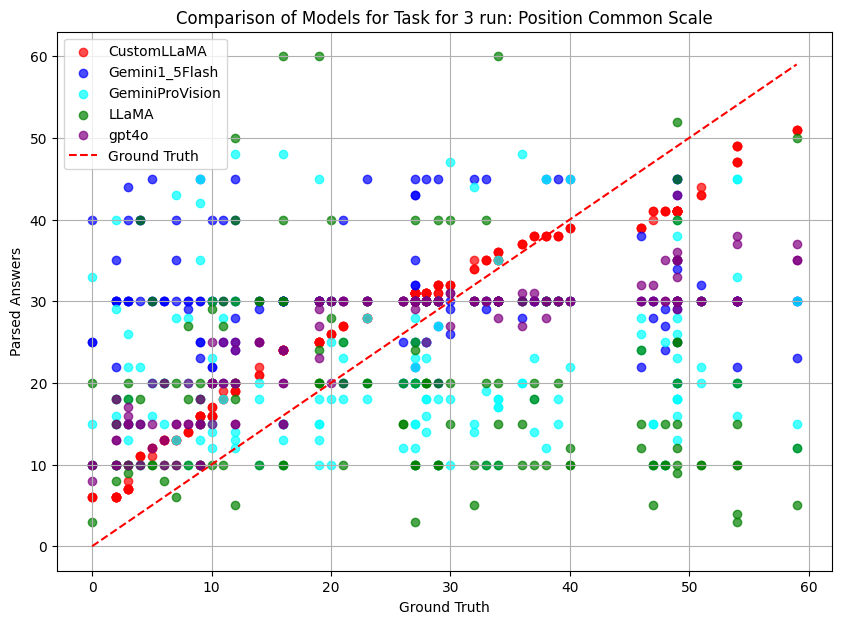

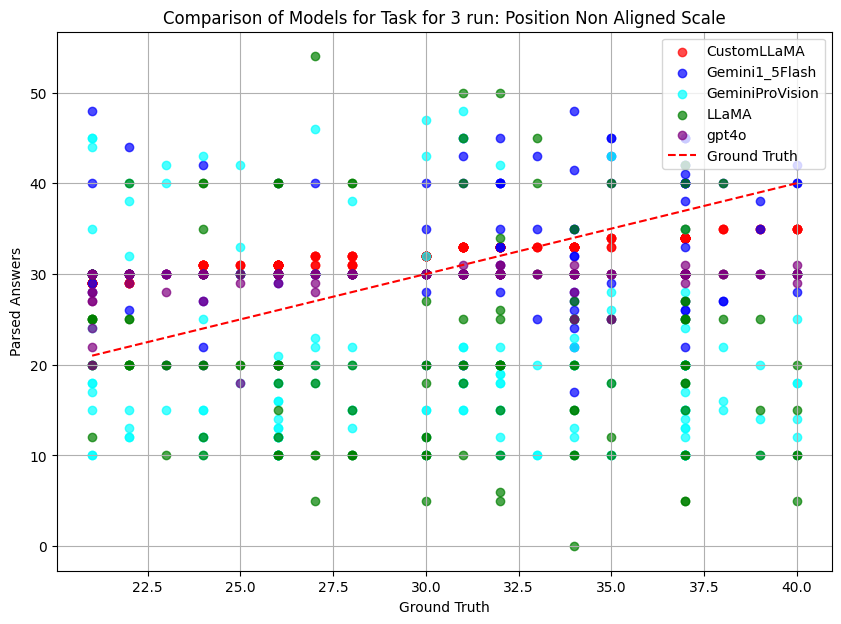

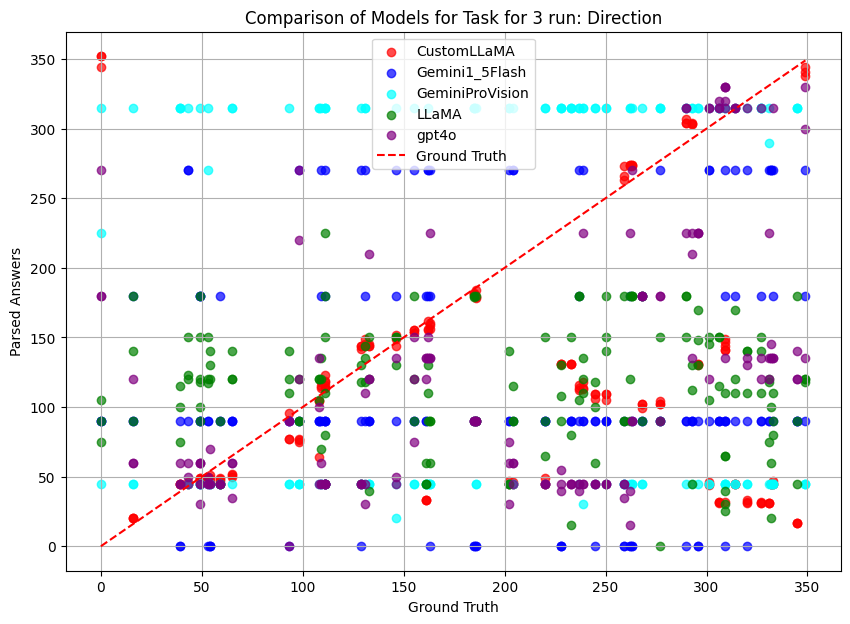

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ensure parsed_answers is converted to float
all_data['parsed_answers'] = all_data['parsed_answers'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)

tasks_to_plot = [
    'length', 
    'position_common_scale', 
    'position_non_aligned_scale',
    'direction', 
    #'angle'
]

# Define custom colors for each model
model_colors = {
    'CustomLLaMA': 'red',
    'gpt4o': 'purple',
    'LLaMA': 'green',
    'Gemini1_5Flash': 'blue',
    'GeminiProVision': 'cyan'
}

for task_to_plot in tasks_to_plot:
    task_data = all_data[all_data['task'] == task_to_plot]

    plt.figure(figsize=(10, 7))

    for model_name, model_data in task_data.groupby('model_name'):
        # Ensure ground truth and parsed answers are the same size
        x_values = model_data['ground_truth'].values
        y_values = model_data['parsed_answers'].values

        plt.scatter(x_values, y_values, label=model_name, alpha=0.7, color=model_colors.get(model_name, 'gray'))  # Default to gray if model not found

    plt.xlabel('Ground Truth')
    plt.ylabel('Parsed Answers')
    plt.title(f"Comparison of Models for Task for 3 run: {task_to_plot.replace('_', ' ').title()}")

    min_gt, max_gt = task_data['ground_truth'].min(), task_data['ground_truth'].max()
    plt.plot([min_gt, max_gt], [min_gt, max_gt], 'r--', label='Ground Truth')  # Line for Ground Truth

    plt.legend()
    plt.grid(True)
    plt.show()


In [28]:
# Filter for 'CustomLLaMA' and select both 'raw_answers' and 'parsed_answers'
checkmodel = direction_result[direction_result['model_name'] == 'CustomLLaMA'][['raw_answers', 'parsed_answers']]

pd.set_option('display.max_colwidth', None)

checkmodel.head(5)


,raw_answers,parsed_answers
166,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n141.0,[141.0]
167,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n102.0,[102.0]
168,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n49.0,[49.0]
169,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n75.0,[75.0]
170,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n106.0,[106.0]


In [40]:
# Display the first few rows for each model

pd.set_option('display.max_colwidth', None)

models = direction_result['model_name'].unique()

for model in models:
    print(f"Displaying data for model: {model}\n")
    checkmodel = direction_result[direction_result['model_name'] == model][['raw_answers', 'parsed_answers']]
    print(checkmodel.head(2), "\n\n")

Displaying data for model: gpt4o

  raw_answers parsed_answers
0         330        [330.0]
1         180        [180.0] 


Displaying data for model: CustomLLaMA

                                                                                                                                                               raw_answers  \
166  user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n141.0   
167  user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation. Only answer in number.\nassistant\n\n102.0   

    parsed_answers  
166        [141.0]  
167        [102.0]   


Displaying data for model: LLaMA

                                                                                                                                                             raw_answers  \
332  user\n\nPlease estimate the directio

In [ ]:
import pandas as pd

# Set Pandas to display full text without truncation
pd.set_option('display.max_colwidth', None)

# Get the unique model names from the 'model_name' column
models = direction_result['model_name'].unique()

# Loop through each model, filter data, and display the first few rows
for model in models:
    print(f"Displaying data for model: {model}\n")
    
    # Filter for the current model and select 'raw_answers' and 'parsed_answers'
    checkmodel = direction_result[direction_result['model_name'] == model][['raw_answers', 'parsed_answers']]
    
    # Display the first few rows for the current model
    print(checkmodel.head(), "\n\n")  # Add some space between outputs for readability
